# Exercise Sheet 3- Singular Value Decomposition (SVD)

**Submission until November 21 at 5 p.m. in the corresponding folder in StudIP.** \
For this exercise we want to use the SVD of a matrix $A=U\Sigma V^\top$ to solve different tasks. In particular, we will make use the truncated SVD, $U_k\Sigma_k V_k^\top = \sum_{i=1}^k \sigma_i u_i v_i^\top$, where only the first $k$ singular values of $A$ are considered.

## (1) SVD-based classification of MNIST dataset

We start with the well-known MNIST data set, which consists of 70,000 images of hand-written digits from 0 to 9, each image is $28\times 28$ pixels (8-bit gray value). The data set is split into 60,000 training images and 10,000 test images.

Execute the following code cells to get an idea about the data set and visualize some numbers.

2023-11-21 12:23:13.326218: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-21 12:23:14.504697: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-21 12:23:14.510538: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 12:23:18.640234: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Out of the 60,000 training images:
   5923  images belong to digit  0 , first five examples:


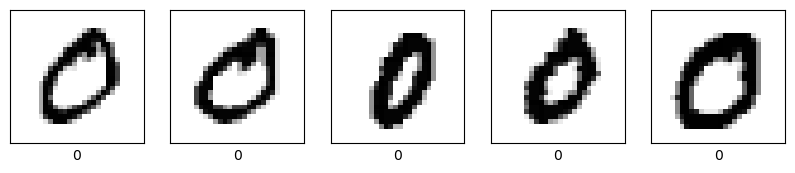

   6742  images belong to digit  1 , first five examples:


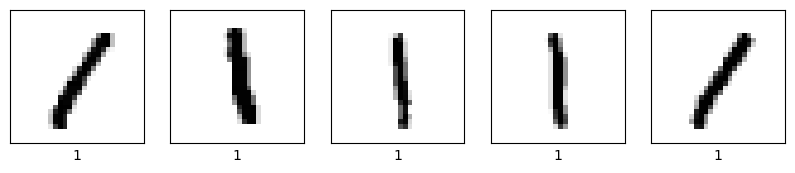

   5958  images belong to digit  2 , first five examples:


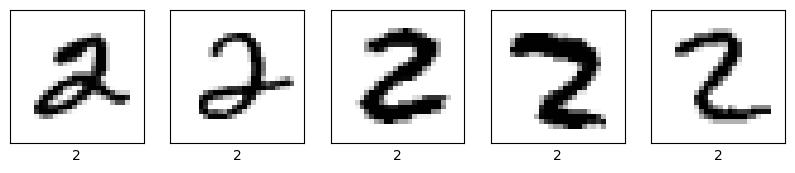

   6131  images belong to digit  3 , first five examples:


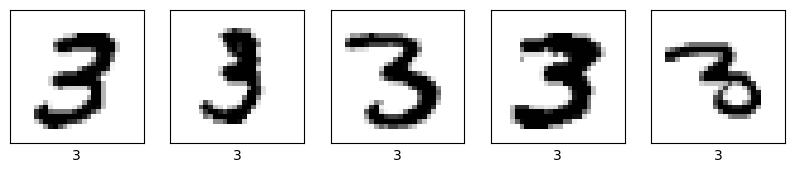

   5842  images belong to digit  4 , first five examples:


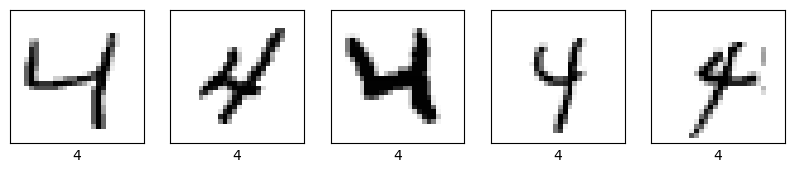

   5421  images belong to digit  5 , first five examples:


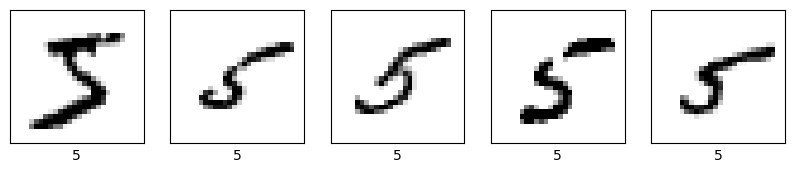

   5918  images belong to digit  6 , first five examples:


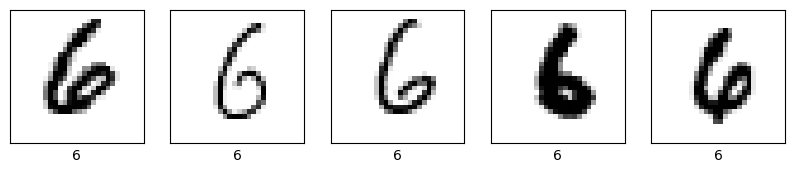

   6265  images belong to digit  7 , first five examples:


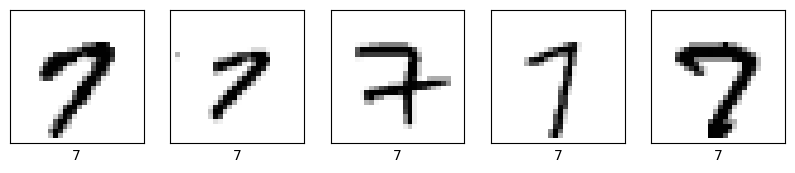

   5851  images belong to digit  8 , first five examples:


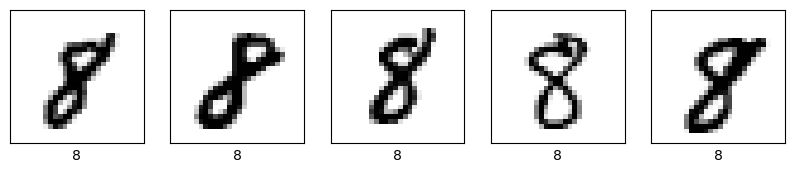

   5949  images belong to digit  9 , first five examples:


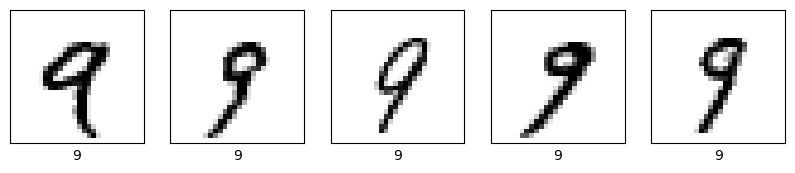

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mplt
np.random.seed(1234)

# load MNIST data set with 60,000 training images (28x28) of digits 0,1,...,9
# and 10,000 test images
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# normalize to range [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0
#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# helper function to display images
# idxs is array of indices for images and labels input parameter
# images is array of dimension (number_of_images,num_rows,num_columns)
# labels is array of dimension (number_of_images)
def show_img(idxs, images, labels):
    num_cols = 5
    num_rows = int(np.ceil(np.array(idxs).size/5))
    plt.figure(figsize=(2*num_cols, 2*num_rows))
    for i, idx in enumerate(idxs):
        plt.subplot(num_rows,num_cols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx], cmap=plt.cm.binary)
        plt.xlabel(labels[idx])
    plt.tight_layout
    plt.show()

print('Out of the 60,000 training images:')

for cur_digit in range(10):
    indices_d = np.argwhere(train_labels == cur_digit)[:,0]
    print('  ', indices_d.size,' images belong to digit ', cur_digit, ', first five examples:')
    show_img(indices_d[0:5], train_images, train_labels)

 The first 10 entries of the training data:


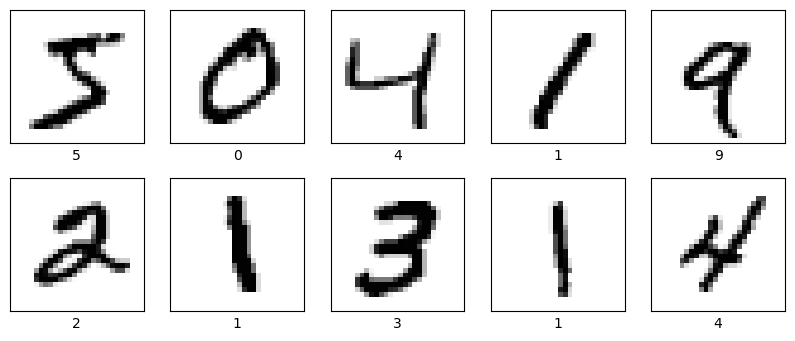

In [2]:
# Show the first 10 entries of the training data
print(' The first 10 entries of the training data:')
show_img(range(10), train_images, train_labels)

**Task: For each digit $d\in\{0,1,2,\ldots,9\}$, compute the truncated SVD of a certain number ($m\in\mathbb{N}$) of training images, e.g., choose $m=1000$ and $k=20$ singular values. Then, display the first and last left-singular vector of each digit as an image (e.g. using the show_img function from before).Explain in a few words, why the both images look so different. (8 points)**  
They are ordered from essentially the mean of the number to noise. That is why the first u looks like the real number and the last more like a noisy variant. See "mean" below

Hint: Copy the $28\times 28$ pixels ($=28^2=784$) of the $m$ training images (for each digit $d$) into a matrix  $A^{(d)}\in\mathbb{R}^{784 \times m}$, with each column belonging to one reshaped image. Then, compute the matrices of the truncated SVD $U^{(d)}_k \Sigma^{(d)}_k (V^{(d)}_k)^\top = A^{(d)}_k$ of $A^{(d)}$. For displaying the images, undo the reshaping for the first and last singular vector of $U^{(d)}_k\in\mathbb{R}^{784\times k}$.

The related numpy functions are `np.linalg.svd` (full) and `np.sparse.linalg.svds` (truncated). Gibt es nicht

In [3]:
m = 1000
k = 20
u = np.zeros((10,28*28,k))
s = np.zeros((10,k))
vh = np.zeros((10,k,m))
train = np.zeros((10,28*28,1000))
for i in range(10):
    img = train_images[train_labels==i]
    train[i] = img[:m].reshape((m,-1)).T
    t1,t2,t3 = np.linalg.svd(train[i])
    u[i] = t1[:,:k]
    s[i] = t2[:k]
    vh[i] = t3[:k,:]

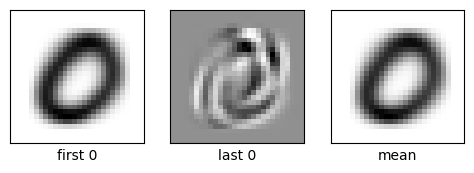

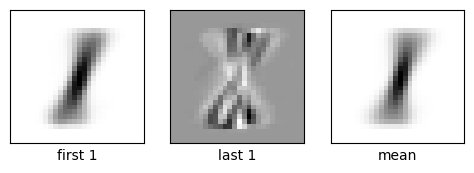

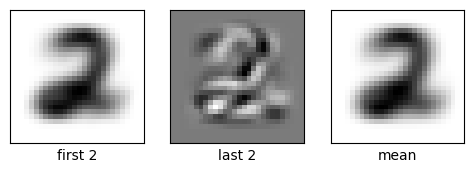

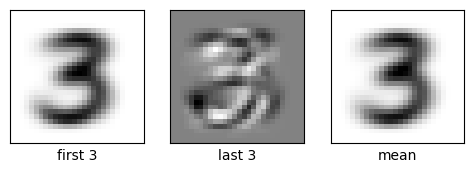

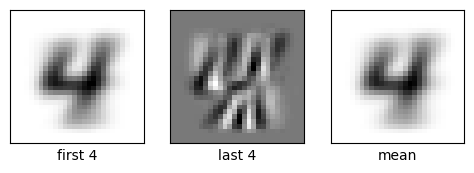

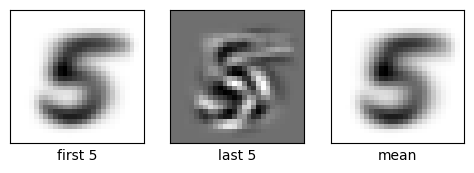

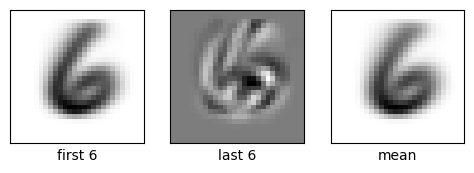

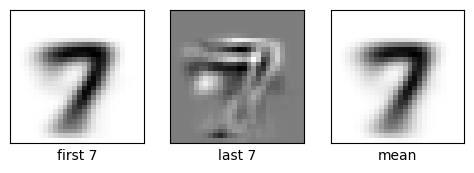

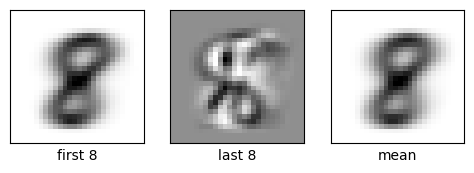

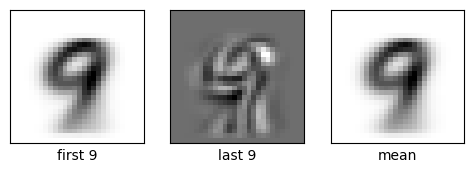

In [4]:
for i in range(10):
    img = train_images[train_labels==i]
    show_img(range(3), (u[i,:,0].reshape((28,-1)),u[i,:,-1].reshape((28,-1)),np.mean(img,axis=0)), ("first "+str(i),"last "+str(i),"mean"))


 **Task: Use the matrices $U^{(d)}_k\in\mathbb{R}^{784\times k}$, $d\in\{0,1,\ldots,9\}$, to perform the classification as presented in the lecture. Compute the accuracy of the prediction. (4 points)** (Remark: 95% can be easily achieved.)
 
 Hint: Use the array "test_images" from above to make a prediction. Use residuals of the form $\lVert z - U^{(d)} \left( U^{(d)} \right)^{T}z \rVert$ for each digit $d$ and each images $z$ in test_images.

In [5]:
# array of dimension (m, 10), each entry contains the residual
prediction_residuals = np.zeros((test_images.shape[0],10))

# array of dim (m) with predicted digit
prediction_labels = np.zeros(test_images.shape[0], dtype='int')

# TODO: 
for i in range(10):
    prediction_residuals[:,i] = np.linalg.norm(test_images.reshape((10000,-1)).T-np.dot((u[i]@u[i].T),test_images.reshape((10000,-1)).T),axis=0)
prediction_labels=np.argmin(prediction_residuals,axis=1)==test_labels
np.count_nonzero(prediction_labels)/len(prediction_labels)

0.9518

After having computed the `prediction_residuals` and `prediction_labels` arrays, you can execute the following code for some visualization.

First  10  images with classification results and residuals:


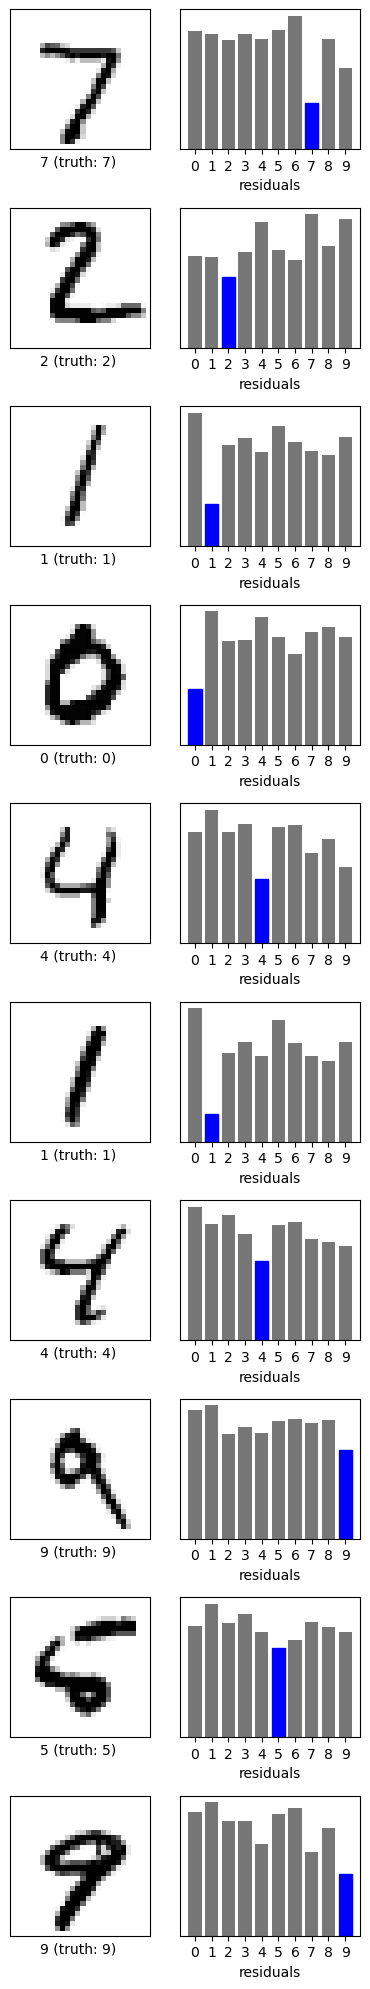

In [ ]:
def plot_image_argmin(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmin(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} (truth: {}) ".format(predicted_label,
                                true_label,
                                color=color))

def plot_value_array_argmin(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    plt.xlabel('residuals')
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    predicted_label = np.argmin(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

def plot_first_images_argmin(num_rows, prediction_residuals, test_labels, test_images):
    num_cols = 1
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image_argmin(i, prediction_residuals[i], test_labels, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array_argmin(i, prediction_residuals[i], test_labels)
    plt.tight_layout()
    plt.show()

# Plot first N images with classification results and residuals
N = 10
print('First ', N, ' images with classification results and residuals:')
plot_first_images_argmin(N, prediction_residuals, test_labels, test_images)

First  10  images with failed classification results and residuals:


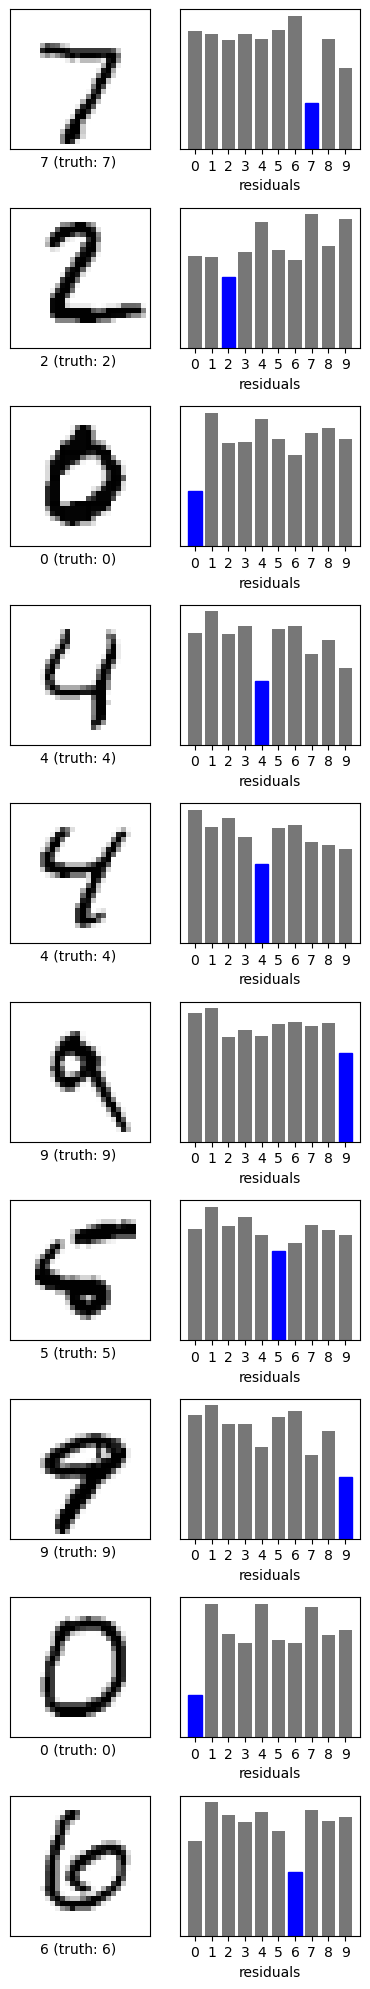

In [ ]:
def plot_first_failures(num_rows, prediction_labels, test_labels, prediction_residuals, test_images):
    failed_indices = np.where(prediction_labels != test_labels)[0]
    num_cols = 1
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(min(num_images,failed_indices.size)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image_argmin(failed_indices[i], prediction_residuals[failed_indices[i]], test_labels, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array_argmin(failed_indices[i], prediction_residuals[failed_indices[i]], test_labels)
    plt.tight_layout()
    plt.show()

# Plot images for first N failed classification results
N = 10
print('First ', N, ' images with failed classification results and residuals:')
plot_first_failures(N, prediction_labels, test_labels, prediction_residuals, test_images)

In [1]:
#-2 points, explanation is missing

### Points 10/12

## (2) SVD-based low-rank approximation of US Supreme Court dataset.

The United States Supreme Court is comprised of judges which are appointed by the president when a seat becomes vacant. Naturally, the two party system of the US leads to the judges being either more conservative or more liberal. In the following, we want to analyze decisions during the time of the 2nd court with Chief Justice Rehnquist.

Execute the following code to load the dataset. The columns of the matrix are the 9 judges and the rows are decisions. The decisions are encoded binary, i.e., in $\{0,1\}$.
What is the question???

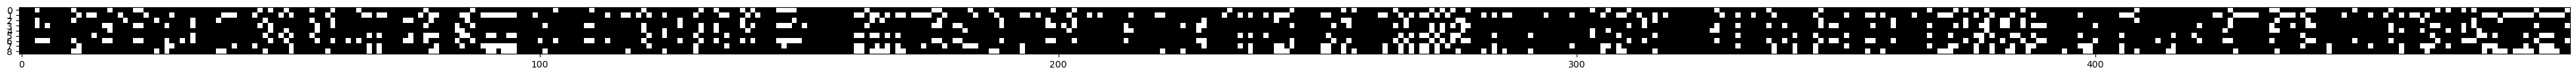

In [ ]:
import pandas as pd

c = pd.read_csv('supreme_court.csv')
A = c.to_numpy().astype(float)

plt.figure(figsize=(50,25))
plt.yticks([0,1,2,3,4,5,6,7,8])
plt.grid(False)
plt.imshow(A.T, cmap=plt.cm.binary)
plt.show()

**As for the MNIST data set, use the truncated SVD to approximate the judges decisions. Try using a different number of singular values. Can you assert a meaning to the singular vectors? (4 Points)**

In [ ]:
u,s,vh = np.linalg.svd(A)
u.shape

(492, 492)

**Compute the truncated SVD for 3 singular values. Compare the original data set, the computed SVD and the computed SVD with binary cut at 0.5. (4 Points)**

In [ ]:
A.shape

(492, 9)

### Points 0/8

## Total Points 10/20